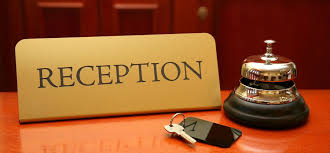

# Hotel Reservations
We will see that what people have prefferd in the hotel and what services they would like to use and analyse the pattern.

## Downloading the Dataset

We will first load the Csv and convert it to a dataset so that we can work on it.

Data Dictionary

*   Booking_ID: unique identifier of each booking

*   no_of_adults: Number of adults

*   no_of_children: Number of Children

*  no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel



*   no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel


*   type_of_meal_plan: Type of meal plan booked by the customer:

*   required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
*   room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

*   lead_time: Number of days between the date of booking and the arrival date

*  arrival_year: Year of arrival date


*  arrival_month: Month of arrival date

*   arrival_date: Date of the month

*   market_segment_type: Market segment designation.

*   repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

*   no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking


*   no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

*   avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)


*   booking_status: Flag indicating if the booking was canceled or not.


*   no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)






In [ ]:
import pandas as pd
import numpy as np

The dataset has been downloaded and extracted.

In [ ]:
df = pd.read_csv("Hotel.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

The taken data is clean and there is no cleaning required 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We are getting a general idea that this file has 19 coumns having non null values and we can also see there respective data type

In [ ]:
df[df.isnull() == True].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

We can see there are zero null values so the data is clean

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Looking at the above table we are getting some general idea about the table which is as follows-
*  At average almost we can say 2 people book the hotel and 0 childern book the hotel.

*   Hotels are more likely to be booked on  week nights
*   All dont require parking space.


*  Max adult booking is 4 && Max Childern is 10








In [ ]:
df["family_size"] =  df.no_of_adults + df.no_of_children
df["family_size"].value_counts()

2     23942
1      7552
3      3851
4       912
5        15
12        1
10        1
11        1
Name: family_size, dtype: int64

Now since our data is clean let us move to next phase of analyse the data.


## Exploratory Analysis and Visualization

With use of graph let us analyse the data.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')


Text(0.5, 1.0, 'Meal Plans\n')

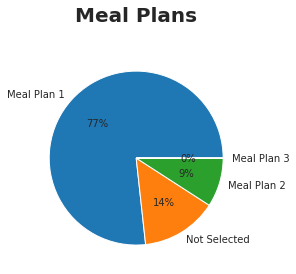

In [ ]:
a = df.type_of_meal_plan.value_counts()
total = df.type_of_meal_plan.count()
plt.pie(a, labels = ['Meal Plan 1','Not Selected','Meal Plan 2','Meal Plan 3'],autopct='%.0f%%')
plt.title("Meal Plans\n" , fontname="Times New Roman", size=20,fontweight="bold")



*   We are able to see that a huge about 77% of people prefer meal plan 1.
*   Meal plan 1> no meal>meal plan 2 > meal plan3





Text(0.5, 1.0, 'People arriving at weekdays')

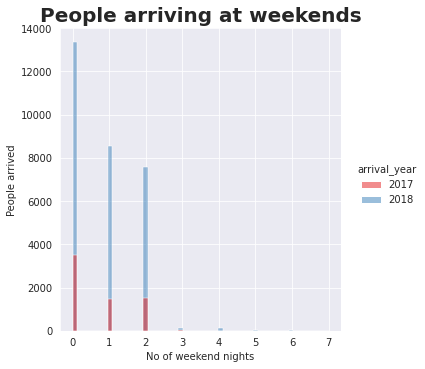

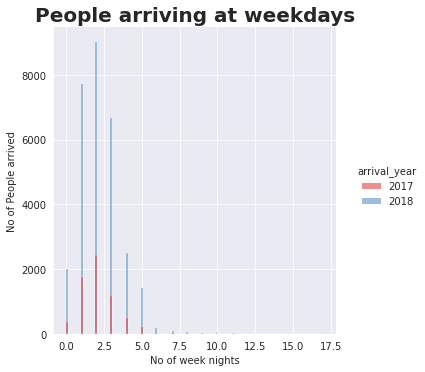

In [ ]:
x1 = df.no_of_weekend_nights
x2 = df.no_of_week_nights
sns.displot(x =x1,kde=False, hue = df['arrival_year'] , palette = 'Set1', data=df)
plt.xlabel('No of weekend nights')
plt.ylabel('People arrived')
plt.title("People arriving at weekends", fontname="Times New Roman", size=20,fontweight="bold")

sns.displot(x =x2,kde=False,
hue = df['arrival_year'] , palette = 'Set1', data=df)
plt.xlabel('No of week nights')
plt.ylabel('No of People arrived')
plt.title("People arriving at weekdays", fontname="Times New Roman", size=20,fontweight="bold")

Insights-

*   We can say that majority of people come week nights and usually stay for about 2 days as it has maximum booking of 8.6k
*   People staying for weekend is 8.2k






Text(0.5, 1.0, 'Adults acoompanied by  childern ')

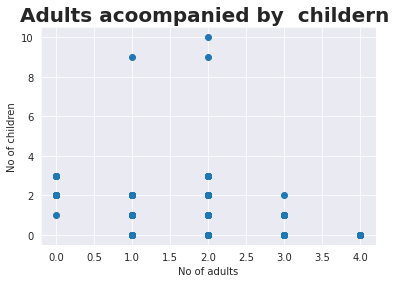

In [ ]:
x= df.no_of_adults
y= df.no_of_children
plt.scatter(x,y)
plt.xlabel('No of adults')
plt.ylabel('No of children')
plt.title("Adults acoompanied by  childern ", fontname="Times New Roman", size=20,fontweight="bold")

From Above data we can say that at an average 2 people book the hotel and number of childern usually  varies from 0 - 2

Text(0.5, 1.0, 'Booking done for each room type')

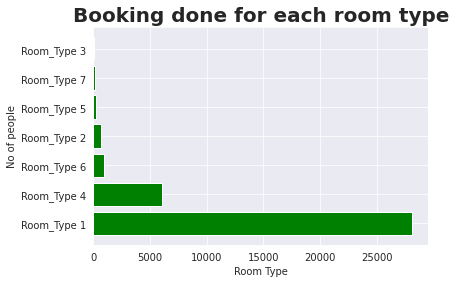

In [ ]:
X = df.room_type_reserved.value_counts()
Y = ['Room_Type 1','Room_Type 4','Room_Type 6','Room_Type 2','Room_Type 5','Room_Type 7','Room_Type 3']
plt.barh(Y,X,color = 'g')
plt.xlabel('Room Type')
plt.ylabel('No of people')
plt.title("Booking done for each room type", fontname="Times New Roman", size=20,fontweight="bold")



1.   We can see that most of the people prefer room type 1 having number of people booked over 35k
2.  Least booked is room type 3



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cost per room type for each year')

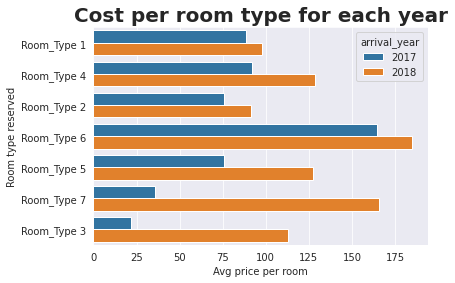

In [ ]:
x =df.avg_price_per_room
y =df.room_type_reserved
z= df.arrival_year
sns.barplot(x,y,ci=0,hue =z)
plt.xlabel('Avg price per room')
plt.ylabel('Room type reserved')
plt.title("Cost per room type for each year", fontname="Times New Roman", size=20,fontweight="bold")

We can clearly see there is an inflation in the cost of the rooms in a year span and room type 3 cost has highly increased allmost by 80%

Text(0.5, 1.0, 'Booking Type ')

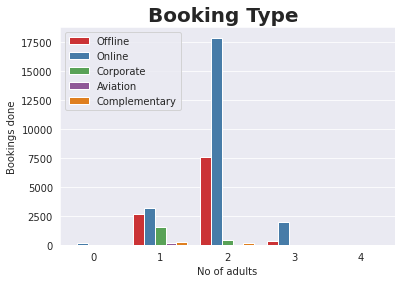

In [ ]:
x = df.no_of_adults
y = df.market_segment_type
sns.countplot(x=x, hue = y,
palette = 'Set1')
plt.legend(loc=2)
plt.xlabel('No of adults')
plt.ylabel('Bookings done')
plt.title("Booking Type ", fontname="Times New Roman", size=20,fontweight="bold")

Most of booking in done via online methord for 2 people and least amount of booking is done  Aviation.

## Asking and Answering Questions

Now let us analyse some questions and further analyse them.
 


#### Q1: Higest cost of the room ?

In [ ]:
a = df["avg_price_per_room"]
print(a.max(), "euros") 

540.0 euros


540 is the highest cost of the room.

In [ ]:
df.loc[df.avg_price_per_room ==540]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,family_size
33114,INN33115,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.0,0,Canceled,2


Booking was done for room type 1, offlline for 30 days  for 2 adults

#### Q2:percent of people taking parking till now?

In [ ]:
a = df[df['required_car_parking_space'] == 1].count()
(a.required_car_parking_space/df.required_car_parking_space.count())*100

3.09855272226051

Less than 3% people ask for parking

#### Q3: Which Year has the max income and by how much percent?

In [ ]:
x =df[df['arrival_year'] == 2017]['avg_price_per_room'].sum()
y =  df[df['arrival_year'] == 2018]['avg_price_per_room'].sum()
print("year 2017:",x,"\nyear 2018:",y)
z = ((y-x)/y*100)
print('%.2f' % z,"%")

year 2017: 586441.73 
year 2018: 3165247.15
81.47 %


Year 2018 has more sales and sales have increased by 81.47%

#### Q4:Average coming back percent?

In [ ]:
a =df[df['repeated_guest']==1].count()
b = df.repeated_guest.count()
(a.repeated_guest/b)*100

2.563749138525155

coming back percent is about 2.5 %

#### Q5: Which Month has the most booking ?



Text(0.5, 1.0, 'Price of room for each year')

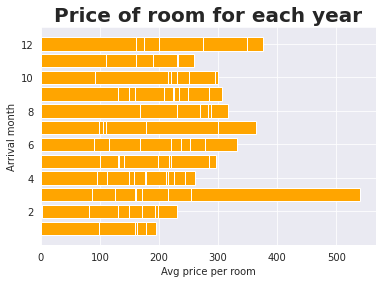

In [ ]:
a = pd.melt(df, id_vars =['arrival_month'], value_vars =['avg_price_per_room'])
plt.barh(a.arrival_month,a.value,color ="orange")
plt.xlabel('Avg price per room')
plt.ylabel('Arrival month')
plt.title("Price of room for each year", fontname="Times New Roman", size=20,fontweight="bold")

We can see that rooms are most costly in the month of march with cost exceeding 500

## Inferences and Conclusion

We can state that many people comming to the hotel usually have family size of 2. Most booking come in the month of march as well as cost of rooms have also increased in one year with some suits having hike above 50%.Only about 3% of people have used the parking services.Meal type 1 has the highest demand.
Most bookings are done online

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:




*   Data set: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
*   Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
*   opendatasets Python library: https://github.com/JovianML/opendatasets

As a next step, I will try out a project on another dataset  from: featured data set from Jovian

SyntaxError: ignored